In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature

In [2]:
start = "2025_01_01_00Z"
end = "2025_01_31_00Z"

file_paths = ["swd_files/satellite_btd_2025_01_01_00Z.nc", 
    "swd_files/satellite_btd_2025_01_02_00Z.nc",
    "swd_files/satellite_btd_2025_01_03_00Z.nc", 
    "swd_files/satellite_btd_2025_01_04_00Z.nc", 
    "swd_files/satellite_btd_2025_01_05_00Z.nc", 
    "swd_files/satellite_btd_2025_01_06_00Z.nc", 
    "swd_files/satellite_btd_2025_01_07_00Z.nc", 
    "swd_files/satellite_btd_2025_01_08_00Z.nc", 
    "swd_files/satellite_btd_2025_01_09_00Z.nc", 
    "swd_files/satellite_btd_2025_01_10_00Z.nc", 
    ]

In [3]:
data_arrays = [xr.open_dataarray(file) for file in file_paths]

In [4]:
combined = xr.concat(data_arrays, dim="datetime")

In [5]:
median_data = combined.median(dim="datetime")

In [7]:
#median_data.to_netcdf("swd_climatology_files/"+start+"-"+end+".nc")

In [8]:
#--- US Southwest
latitude_north = 40.5
latitude_south = 27.5
longitude_west = -123
longitude_east = -100

AttributeError: 'DataArray' object has no attribute 'lon'

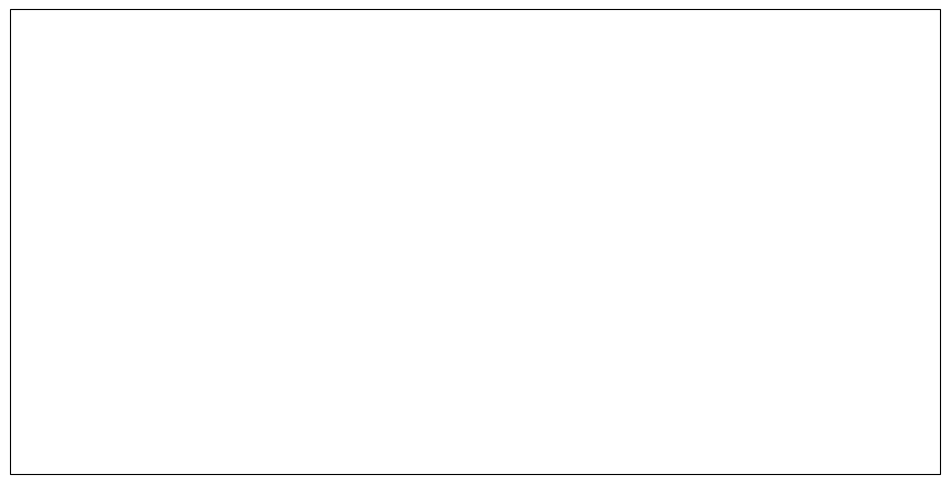

In [16]:
projection=ccrs.PlateCarree(central_longitude=0)

fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})

#---Custom colorbar
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm

# Define custom colormap: Greys for negative, Reds for positive
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['grey', 'white', 'red'])
# Use TwoSlopeNorm to center at 0
norm = TwoSlopeNorm(vmin=-12, vcenter=0, vmax=3)

levels = np.linspace(-12, 3, 31)

c=ax.contourf(median_data.lon, median_data.lat, median_data, cmap=cmap, extend='both', norm=norm, levels=levels)


clb = plt.colorbar(c, shrink=0.4, pad=0.02, ax=ax)
clb.ax.tick_params(labelsize=15)
clb.set_label('(K)', fontsize=15)

ax.set_extent([longitude_west, longitude_east, latitude_south, latitude_north], crs=ccrs.PlateCarree())

ax.set_title("GOES BTD (12.3 μm - 10.3 μm) Climatology\n("+start+" - "+end+")", fontsize=20, pad=10)
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(feature.STATES, zorder=100, edgecolor='#000', facecolor='none', linewidth=0.5)

#fig.savefig("swd_climatology_images/"+start+"-"+end, dpi=200, bbox_inches='tight')
fig.show()